In [1]:
from rag_chroma_multi_modal.chain import chain as rag_chain

input_str = """what is the title of unit 5 chapter 1?
A. the concept of Artificial Intelligence
B. Applications of Artificial Intelligence
C. Techniques of Artificial Intelligence
D. Course roadmap
"""
out = rag_chain.invoke(input_str)
print(out)

/home/jibby/anaconda3/envs/sic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jibby/anaconda3/envs/sic/lib/python3.11/site-packages/open_clip/factory.py:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add

{'answer': 'Answer: D. Course roadmap\nExplanation: The title of Unit 5 in Chapter 1 is explicitly stated as "Course Roadmap" in the provided slides.\n', 'ref_images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCALQBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPw

In [3]:
len(out['ref_images'])

2

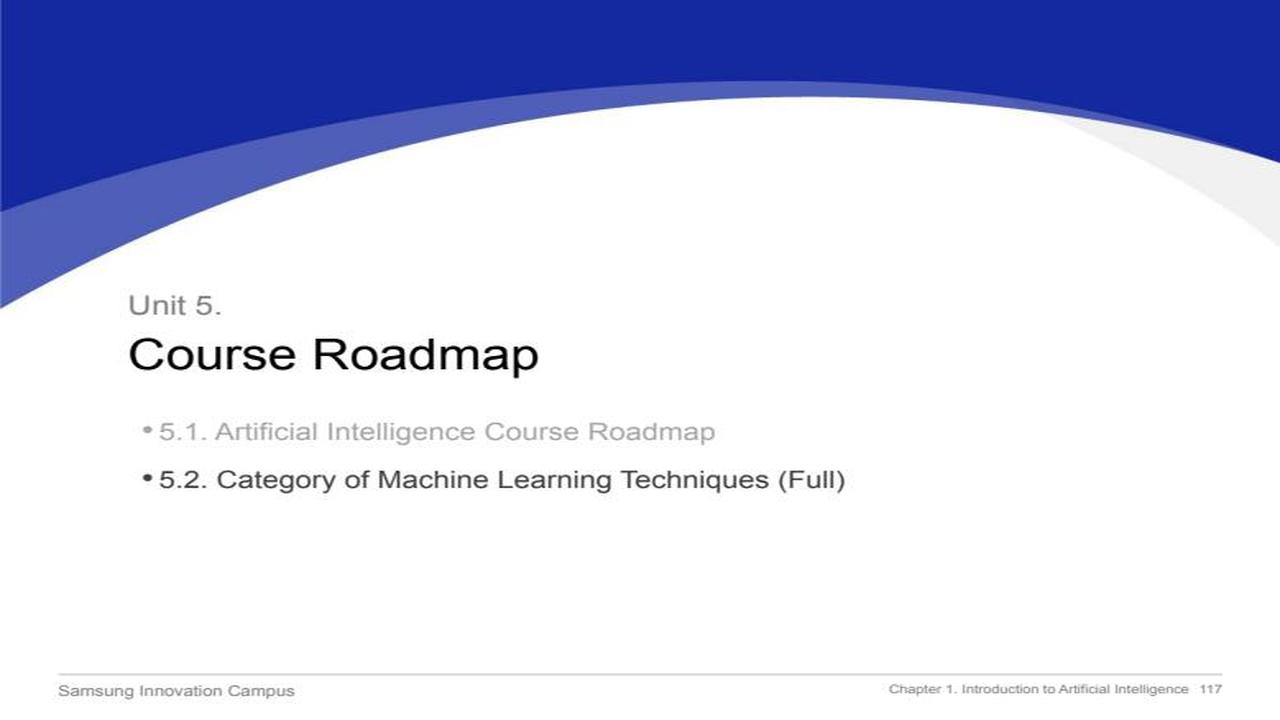

In [5]:
import base64
from PIL import Image
from io import BytesIO


image_data = base64.b64decode(out['ref_images'][1])
image = Image.open(BytesIO(image_data))
image


[{'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'text', 'text': 'You are an analyst tasked with answering questions about visual content.\nYou will be give a set of image(s) from a slide deck / presentation.\nUse this information to answer the user question. \nUser question will be a multi-choice question and the expected output is the following format\n\n            ```response\n            answer: <the correct answer>\n            explanation: <explain why this answer is correct and why other options is false>\n            ```\n            User-provided question: which organization own these slides?\nA. Samsung\nB. Google\nC. Facebook\nD. Apple\n\n\n'}]

```
response


answer
:
 A
.
 Samsung


ex
planation
:
 The
 slides
 are
 from
 the
 "
Samsung
 Innovation
 Campus
,"
 as
 indicated
 in
 the
 footer
 of
 each
 slide
.
 This
 c
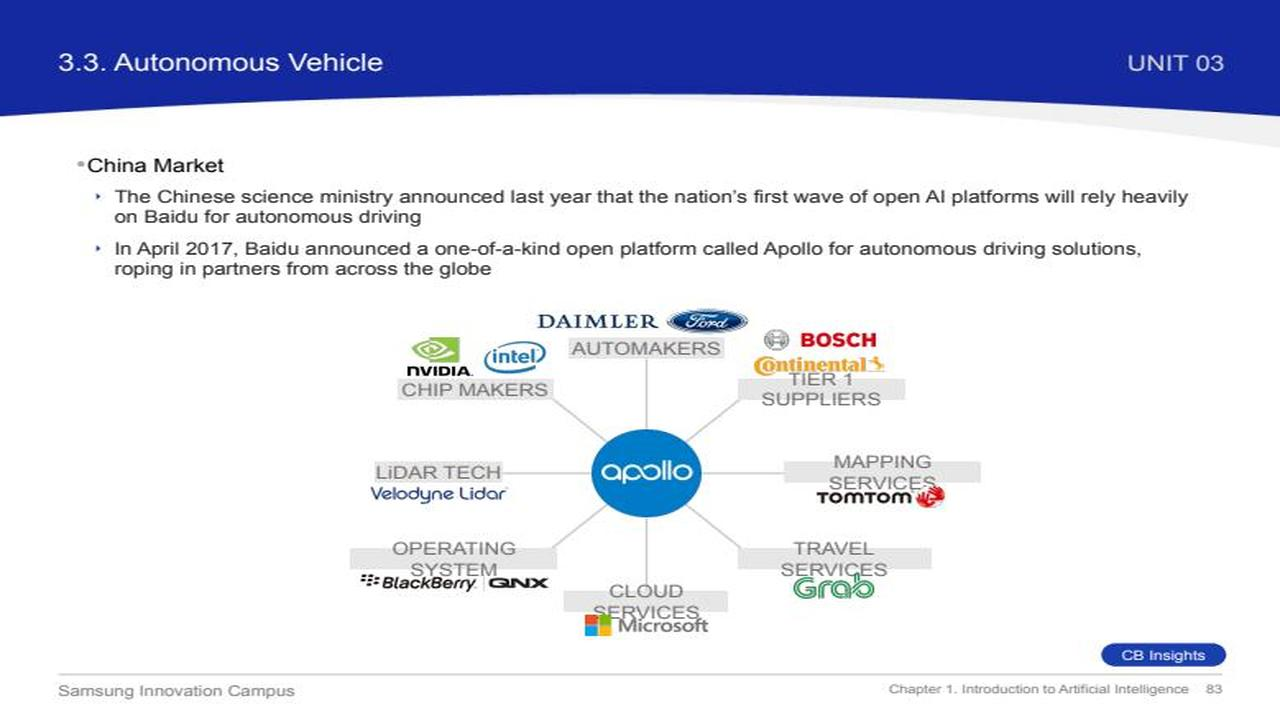
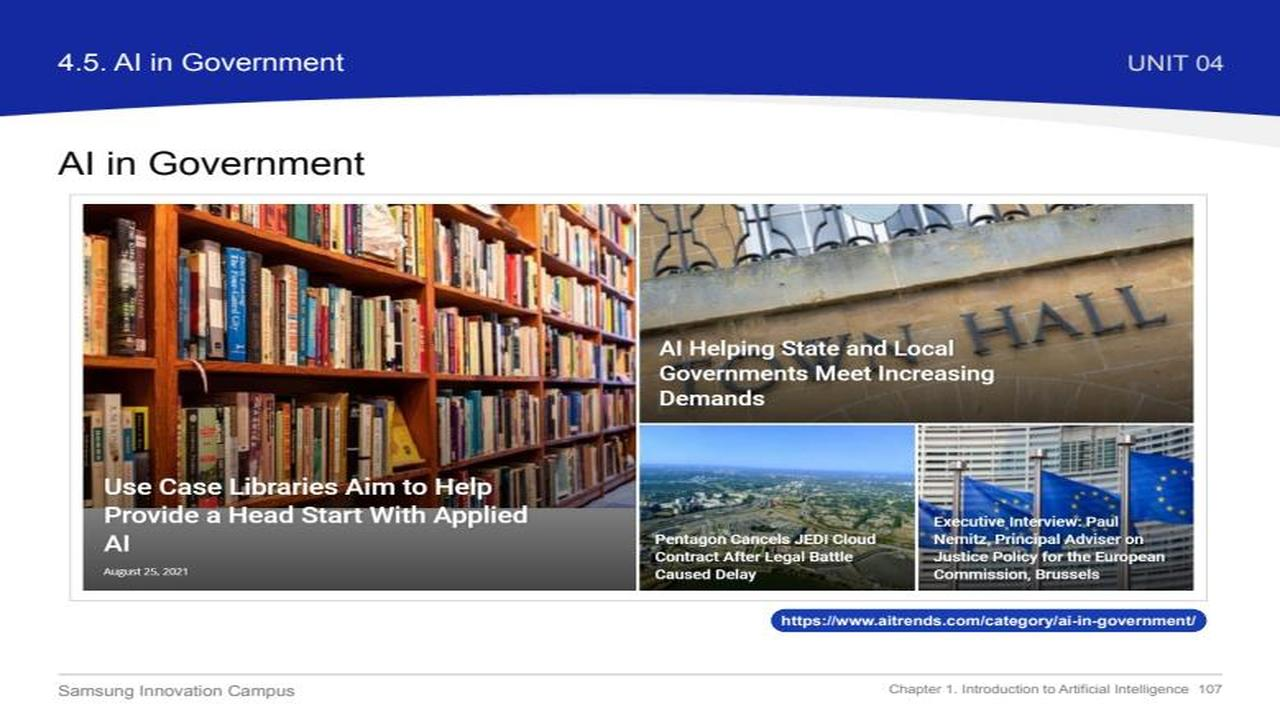
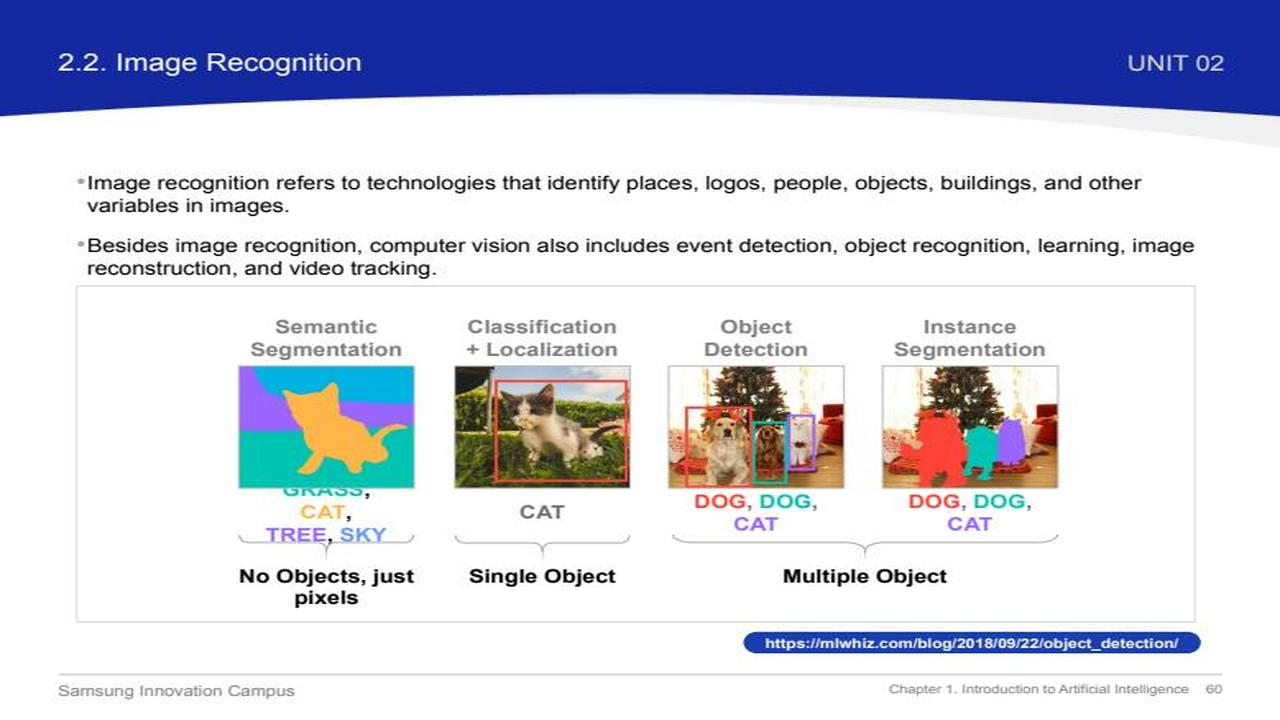
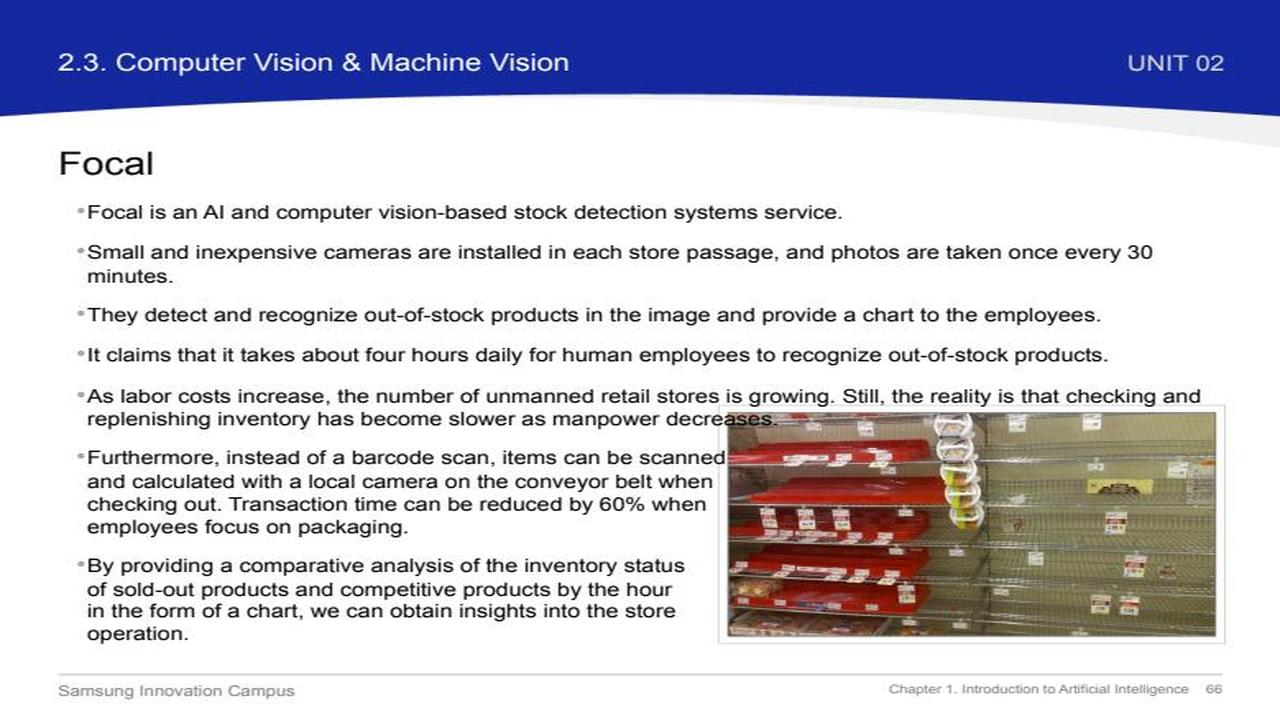

In [7]:
input_str = """which organization own these slides?
A. Samsung
B. Google
C. Facebook
D. Apple
"""
out = rag_chain.stream(input_str)
for i in out:
    print(i)

In [3]:
rag_chain.invoke("How many unit in chapter 1")

'Chapter 1 contains five units. They are:\n\n1. The Concept of Artificial Intelligence\n2. Applications of Artificial Intelligence\n3. Techniques in Artificial Intelligence\n4. Artificial Intelligence: Trends and Markets\n5. Course Roadmap'

In [4]:
rag_chain.invoke("let's talk about AI in healthcare and where it is")

'AI in healthcare is a rapidly evolving field with several promising applications. Based on the provided slides, here are some key areas where AI is being utilized in healthcare:\n\n1. **Disease Prediction**:\n   - AI algorithms are being used to predict the likelihood of diseases. This can help in early diagnosis and preventive care.\n\n2. **Medication Effectiveness**:\n   - AI can analyze patient data to determine how effective certain medications are, potentially leading to more personalized treatment plans.\n\n3. **Heart Disease Diagnosis**:\n   - A machine learning algorithm was trained using data from 3,013 patients to diagnose heart disease. This platform was tested on 7,998 patients and showed high sensitivity (82.5%) and specificity (92.2%), surpassing traditional diagnostic methods.\n\n4. **Detecting Retinopathy**:\n   - AI is used to detect diabetic retinopathy, a leading cause of preventable blindness. The U.S. Academy of Research Ophthalmology tested an AI engine that dist

In [7]:
rag_chain.invoke("what is cognex - visionPro Vidi")

'Cognex - VisionPro ViDi is a deep learning-based image analysis software developed by Cognex, a manufacturer of machine vision systems, software, and sensors. This software is optimized for factory automation and is capable of solving complex tasks such as defect detection, texture and material classification, assembly inspection, and text deciphering, which are challenging to program using rule-based algorithms.\n\nKey points about VisionPro ViDi:\n- It requires only a few hundred images for training and verification, making the process quick and cost-effective.\n- It is designed for non-expert use in the visual field and is developed according to actual factory conditions.\n- It is particularly useful for analyzing industrial images, as shown in applications like printing and weaving.'

In [8]:
rag_chain.invoke("what is the owner of these slides")

'The slides are from the "Samsung Innovation Campus." This information is indicated at the bottom of each slide.'